# OASIS INFOBYTE INTERN
## Task 5: Car Price Prediction with ML

### Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Load CSV file
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [6]:
# view CSV file for starting point 
df.head(8)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0


In [7]:
# view for ending point
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [11]:
df.shape # view Rows & columns

(205, 26)

In [8]:
df.info # dataset information

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [9]:
df.describe() # statistic values

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
df.columns # view coloum names

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [19]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [21]:
df=df.drop("car_ID",axis=1) # i try to drop coloum car_ID

KeyError: "['car_ID'] not found in axis"

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv",index_col=1)
df = df.drop("car_ID",axis=1)

In [23]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,,,,,,,,,,,,,,,,,,,,,
3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
newdf = df[[ "wheelbase", "carlength",
"carwidth", "carheight", "curbweight",
"enginesize", "boreratio", "stroke",
"compressionratio", "horsepower",
 "peakrpm","citympg", "highwaympg", "price"]]

In [27]:
x = newdf.drop('price', axis=1)
y = newdf['price']

In [28]:
y

symboling
 3    13495.0
 3    16500.0
 1    16500.0
 2    13950.0
 2    17450.0
       ...   
-1    16845.0
-1    19045.0
-1    21485.0
-1    22470.0
-1    22625.0
Name: price, Length: 205, dtype: float64

In [29]:
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,,,,,,,,,,,,,
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23


In [30]:
y.astype(float)

symboling
 3    13495.0
 3    16500.0
 1    16500.0
 2    13950.0
 2    17450.0
       ...   
-1    16845.0
-1    19045.0
-1    21485.0
-1    22470.0
-1    22625.0
Name: price, Length: 205, dtype: float64

### This syntax use for removing warning we plot any graph!!

In [33]:
import warnings 
warnings.filterwarnings('ignore') 

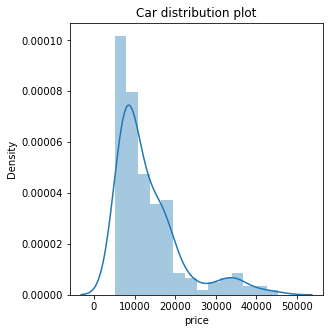

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Car distribution plot')
sns.distplot(df.price)
plt.show()

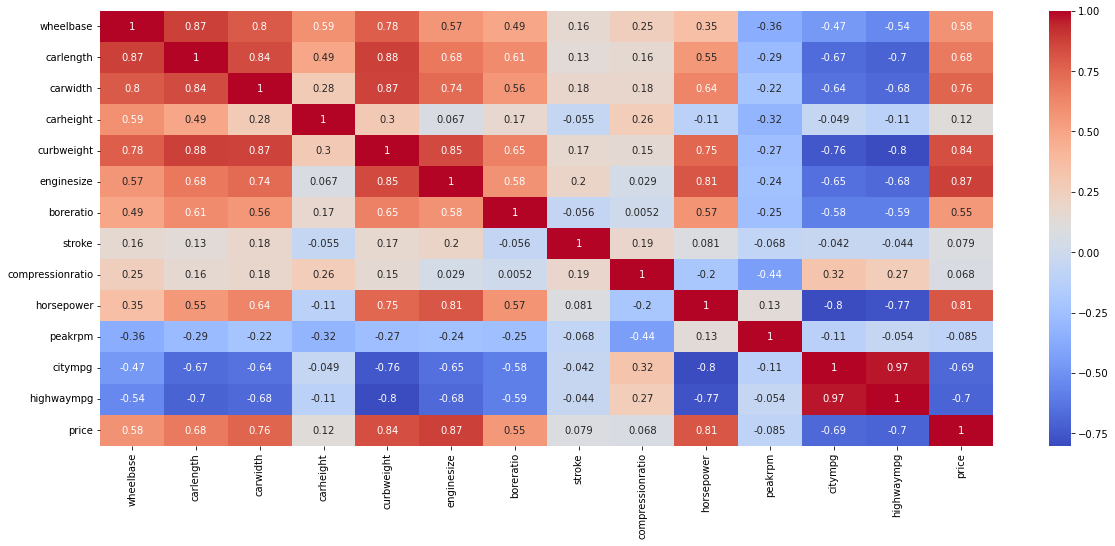

In [38]:
plt.figure(figsize=(20, 8))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

<AxesSubplot:title={'center':'CAR PRICE SPREAD'}, ylabel='price'>

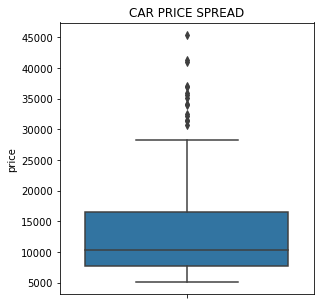

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Car price spread')
sns.boxplot(y=df.price)

In [43]:
df[df.index.duplicated()]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,,,,,,,,,,,,,,,,,,,,,
3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


## Train , Test step

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)

In [46]:
x_train.shape

(164, 13)

In [47]:
x_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,,,,,,,,,,,,,
1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30
0,100.4,180.2,66.9,55.1,2579,97,3.01,3.40,23.0,68,4500,33,38
0,96.9,173.6,65.4,54.9,2650,108,3.62,2.64,7.7,111,4800,23,23
1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,5200,31,37
2,93.7,157.3,64.4,50.8,1918,92,2.97,3.23,9.4,68,5500,37,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,97.3,171.7,65.5,55.7,2300,109,3.19,3.40,10.0,100,5500,26,32
2,95.1,162.4,63.8,53.3,2008,97,3.15,3.29,9.4,69,5200,31,37
1,93.7,157.3,63.8,50.6,1989,90,2.97,3.23,9.4,68,5500,31,38


In [49]:
y_train

symboling
1     7957.0
0    13845.0
0    11694.0
1     7499.0
2     5389.0
      ...   
2     9995.0
2     8249.0
1     6692.0
0    11259.0
0     7895.0
Name: price, Length: 164, dtype: float64

In [51]:
a=x_test
a.head(6)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,,,,,,,,,,,,,
-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
3,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160,5200,19,25
1,94.5,170.2,63.8,53.5,2037,97,3.15,3.29,9.4,69,5200,31,37
0,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.5,123,4350,22,25
0,95.7,166.3,64.4,53.0,2081,98,3.19,3.03,9.0,70,4800,30,37
0,96.5,163.4,64.0,54.5,2010,92,2.91,3.41,9.2,76,6000,30,34


In [52]:
y_test

symboling
-1    19045.0
 3    17199.0
 1     7999.0
 0    28176.0
 0     6938.0
 0     7295.0
 0    17075.0
 2     6669.0
 0    12945.0
-1    28248.0
 3    34028.0
 0    41315.0
 1     6338.0
 1     7609.0
-2    15985.0
 0    20970.0
 1     6229.0
 1     8238.0
 0     7775.0
 2    11199.0
 0    17950.0
-1    10698.0
 2     7975.0
 0     7198.0
 0    35550.0
 0    18150.0
 0     7898.0
 1     8058.0
 2     7053.0
 2     6855.0
-1    31600.0
 0    13499.0
 3    11595.0
 2     9989.0
 1     5348.0
 1     8189.0
 0     6918.0
-1     8921.0
 1     5399.0
 2    17450.0
 2    13950.0
Name: price, dtype: float64

## Impoting decision tree algorithm

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
regressor = DecisionTreeRegressor()

In [55]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
y_pred = regressor.predict(x_test)

In [57]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred    
})

In [58]:
result.head(10)

,actual,predicted
symboling,,
-1,19045.0,22625.0
3,17199.0,19699.0
1,7999.0,7349.0
0,28176.0,25552.0
0,6938.0,7609.0
0,7295.0,7295.0
0,17075.0,13860.0
2,6669.0,6692.0
0,12945.0,16677.5


In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test,y_pred)

0.9270734166409893

In [63]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1614.3902439024391

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

6116999.597560976

## By Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
y_predict = model.predict(x_test)

In [68]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_predict    
})

In [69]:
result.head(10)

,actual,predicted
symboling,,
-1,19045.0,19579.955577
3,17199.0,22457.036577
1,7999.0,5774.358486
0,28176.0,23658.654442
0,6938.0,7164.967043
0,7295.0,8013.066875
0,17075.0,16866.680118
2,6669.0,7778.677300
0,12945.0,10240.721695


In [71]:
r2_score(y_test,y_predict)

0.8207362713128694